# Regression example

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools
import os
from scipy import stats
from scipy import constants
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [2]:
from plotstandards import *
from plotlabels import PlotLabels

In [3]:
# set custom matplotlib rc file 
url_rcfile = 'https://raw.githubusercontent.com/TheFerry10/ml-parameter-identification/master/seaborn-custom-style.mplstyle'
#path_rcfile = 'seaborn-custom-style.mplstyle'
mpl.style.use(url_rcfile)

# Uncomment the following lines, if you wish to use latex fonts in matplotlib
# figures. The first line installs latex fonts, while the second line activates
# the fonts in the matplotlib rc file

#!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
mpl.rcParams['text.usetex'] = True

plotStyle = CustomPlotStyle(textwidth_in_inches=6.0)
plotLabels = PlotLabels()

PATH_TO_FIGURES = 'fig/'
if not os.path.isdir(PATH_TO_FIGURES):
    os.mkdir(PATH_TO_FIGURES)

In [4]:
E = 213*constants.giga #Pa
eps = np.linspace(0,2e-3,50)
def linear_model(x, m):
    return m * x
sig_true = linear_model(eps, E) #Pa
sig_true_with_noise = sig_true + np.random.normal(0, 50*constants.mega, len(eps)) #Pa

# Fit noisy data to linear model.
# The stress is scaled to GPa due to numerical issues. Therefore, the 
# result is also in GPa.
popt, _ = curve_fit(linear_model, eps, sig_true/constants.giga) #GPa
E_predicted_in_GPa = popt[0]
sig_predicted_in_MPa = linear_model(eps, E_predicted_in_GPa) * constants.kilo
sig_true_with_noise_in_Mpa =  sig_true_with_noise / constants.mega

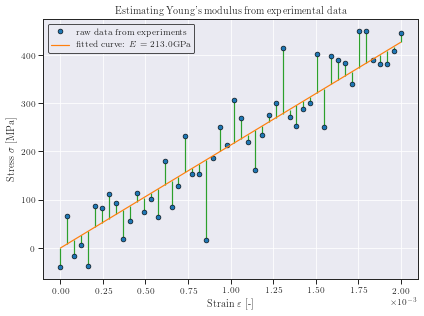

In [5]:
fig, ax = plotStyle.create_figure()
colors = plotStyle.get_color_cycle()
plt.plot(eps, sig_true_with_noise_in_Mpa, 'o', linewidth=0, label='raw data from experiments', color=next(colors))
plt.plot(eps, sig_predicted_in_MPa, label=f'fitted curve: $E$ = {E_predicted_in_GPa}\,GPa', color=next(colors))
plt.vlines(eps, sig_predicted_in_MPa, sig_true_with_noise_in_Mpa, color=next(colors))
plt.xlabel(plotLabels.strain)
plt.ylabel(plotLabels.stress_in_MPa)
plt.title("Estimating Young's modulus from experimental data")
plt.legend()
save_fig('example-regression', output_dir=PATH_TO_FIGURES, file_extensions=['.png'])